In [126]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


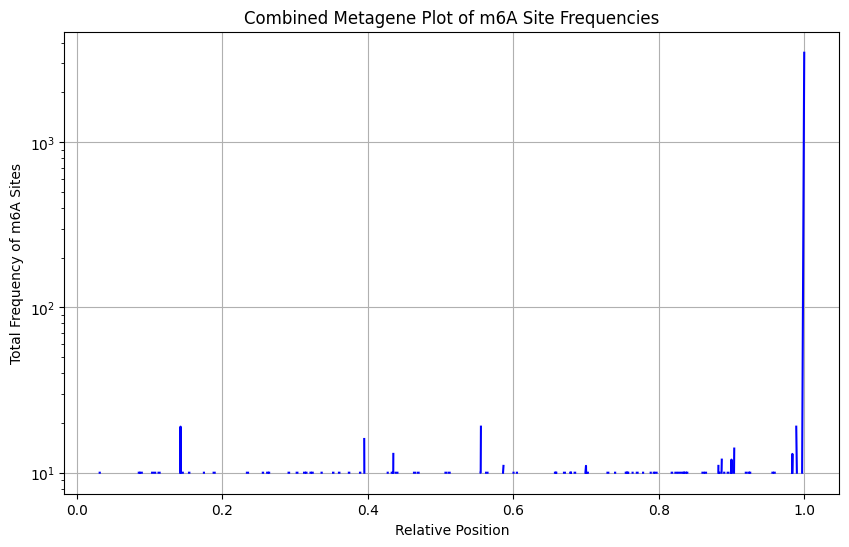

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths for your data
file_paths = [
    "/Users/benedicthalim/Downloads/SGNex_A549_directRNA_replicate5_run1_data_predictions (1).csv",
    "/Users/benedicthalim/Downloads/SGNex_A549_directRNA_replicate6_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_Hct116_directRNA_replicate3_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_Hct116_directRNA_replicate3_run4_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_Hct116_directRNA_replicate4_run3_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_HepG2_directRNA_replicate5_run2_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_HepG2_directRNA_replicate6_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_K562_directRNA_replicate4_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_K562_directRNA_replicate5_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_K562_directRNA_replicate6_run1_data_predictions.csv"
]

# Create an empty list to store processed dataframes
dfs = []

# Load and process each dataframe
for file_path in file_paths:
    df = pd.read_csv(file_path)
    
    # Sort the DataFrame by 'transcript_id' and 'transcript_position'
    df = df.sort_values(by=['transcript_id', 'transcript_position'])
    
    # Calculate the maximum position within each transcript_id
    df['max_position'] = df.groupby('transcript_id')['transcript_position'].transform('max')
    
    # Normalize the transcript position
    df['relative_position'] = df['transcript_position'] / df['max_position']
    
    # Append the processed dataframe to the list
    dfs.append(df)

# Calculate the total frequency of m6A sites at relative positions across all dataframes
total_data = None

for df in dfs:
    data = df[df['score'] > 0.5].groupby('relative_position').size()
    if total_data is None:
        total_data = data
    else:
        total_data += data

# Plot the metagene plot for the combined results

plt.figure(figsize=(10, 6))
plt.plot(total_data.index, total_data.values, color='blue')
plt.yscale('log')  # Set the y-axis to log scale
plt.xlabel('Relative Position')
plt.ylabel('Total Frequency of m6A Sites')
plt.title('Combined Metagene Plot of m6A Site Frequencies')
plt.grid()
plt.show()


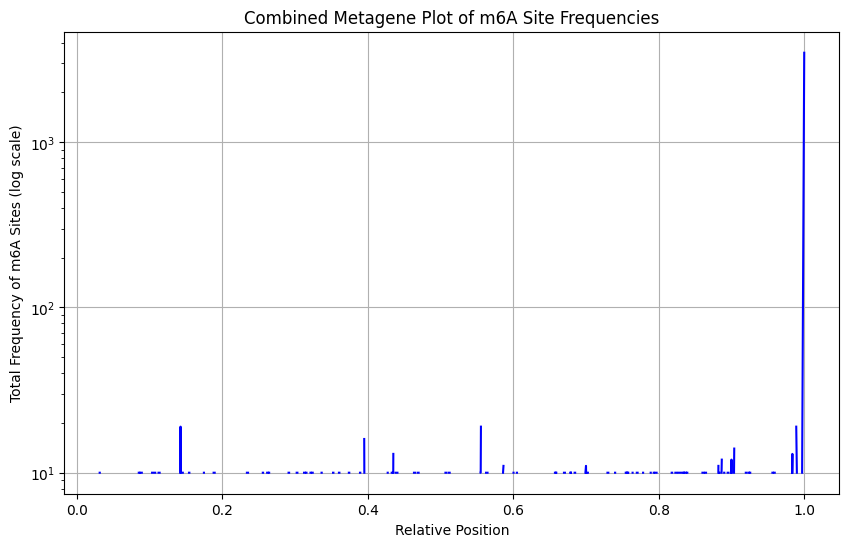

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths for your data
file_paths = [
    "/Users/benedicthalim/Downloads/SGNex_A549_directRNA_replicate5_run1_data_predictions (1).csv",
    "/Users/benedicthalim/Downloads/SGNex_A549_directRNA_replicate6_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_Hct116_directRNA_replicate3_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_Hct116_directRNA_replicate3_run4_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_Hct116_directRNA_replicate4_run3_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_HepG2_directRNA_replicate5_run2_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_HepG2_directRNA_replicate6_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_K562_directRNA_replicate4_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_K562_directRNA_replicate5_run1_data_predictions.csv",
    "/Users/benedicthalim/Downloads/SGNex_K562_directRNA_replicate6_run1_data_predictions.csv"
]

# Create an empty list to store processed dataframes
dfs = []

# Load and process each dataframe
for file_path in file_paths:
    df = pd.read_csv(file_path)
    
    # Sort the DataFrame by 'transcript_id' and 'transcript_position'
    df = df.sort_values(by=['transcript_id', 'transcript_position'])
    
    # Calculate the maximum position within each transcript_id
    df['max_position'] = df.groupby('transcript_id')['transcript_position'].transform('max')
    
    # Normalize the transcript position
    df['relative_position'] = df['transcript_position'] / df['max_position']
    
    # Append the processed dataframe to the list
    dfs.append(df)

# Calculate the total frequency of m6A sites at relative positions across all dataframes
total_data = None

for df in dfs:
    data = df[df['score'] > 0.5].groupby('relative_position').size()
    if total_data is None:
        total_data = data
    else:
        total_data += data

# Plot the metagene plot for the combined results with a logarithmic y-axis
plt.figure(figsize=(10, 6))
plt.plot(total_data.index, total_data.values, color='blue')

plt.xlabel('Relative Position')
plt.ylabel('Total Frequency of m6A Sites (log scale)')
plt.yscale('log')  # Set the y-axis to log scale
plt.title('Combined Metagene Plot of m6A Site Frequencies')
plt.grid()
plt.show()
